## Mini Batch Gradient Descent


In [3]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [4]:
X, y = make_regression(n_samples=10000, n_features=20, n_informative=20, noise=10, random_state=1)

# Normalization of data
u = np.mean(X, axis=0) # find mean rowwise for all 20 columns
std = np.std(X, axis=0)
X = (X-u)/std

In [7]:
## add column of ones at beginning of X
ones = np.ones((X.shape[0],1))   # number of rows must be same as in X and column=1
X = np.hstack((ones, X))
print(X.shape, y.shape)

(10000, 21) (10000,)


- Let us copy our batch gradient descent from "../1Linear_Regression/06_Boston_Houses.ipynb" file. And visualize the data first

## Batch GD:

In [11]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    m = X.shape[0]
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

# Batch Gradient Descent Algorithm
def gradient_descent(X,y,learning_rate = 0.01,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Batch Gradient descent --> Compute the gradient wrt entire dataset
        grad = gradient(X,y,theta)   # pass entire dataset X to calculate gradient
        theta = theta - learning_rate*grad 
        
    return theta,error_list

In [27]:
theta, error_list = gradient_descent(X, y)
print("Final Error:", error_list[-1])

Final Error: 264.0832954333876


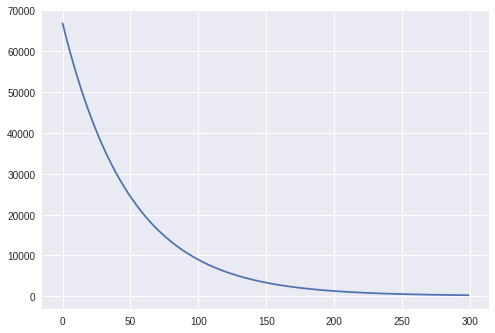

In [15]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.show()

## Now let us implement Mini Batch GD

##### We need to do shuffeling first


In [30]:
# Mini- Batch Gradient Descent Algorithm
## we will use hypothesis(), error() and gradient() functions same from above
def mini_batch_GD(X, y, batch_size=200, learning_rate=0.01, max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    data = np.hstack((X, y.reshape(-1,1)))  # combine X and y for shuffeling
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Mini Batch Gradient descent 
        np.random.shuffle(data)
        m = data.shape[0]  # m is no of examples
        total_batches = m//batch_size  # total no of batches = no of examples/ size of one batch
        
        for i in range(total_batches):
            # choose batch_size no. of rows and all the columns at once(see below command)
            batch_data = data[i*batch_size:(i+1)*batch_size, :]
            
            # extract X and y from it as we have merged them in single array earlier.
            X_batch = batch_data[:,:-1]   # all rows and columns from 0 upto (-1 means last one)
            y_batch = batch_data[:,-1]  # all rows and only last column(-1)
            
            batch_gradient = gradient(X_batch, y_batch, theta)  # pass one whole batch
            theta = theta - learning_rate*batch_gradient  # make update
        
    return theta,error_list

In [31]:
theta_2 , error_list_2 = mini_batch_GD(X, y)
print("Final Error: ", error_list_[-1])

Final Error:  101.46075394630165


- This also gives us a minimum error than the earlier one which was giving us 264 error 

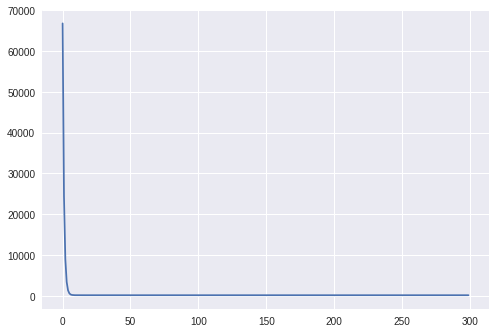

In [32]:
plt.plot(error_list_2)
plt.show()

In [38]:
# Mini- Batch Gradient Descent Algorithm
## we will use hypothesis(), error() and gradient() functions same from above
def mini_batch_GD_3(X, y, batch_size=200, learning_rate=0.01, max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    data = np.hstack((X, y.reshape(-1,1)))  # combine X and y for shuffeling
    
    for i in range(max_iters):        
        np.random.shuffle(data)
        m = data.shape[0]  
        total_batches = m//batch_size  
        
        for i in range(total_batches):
            batch_data = data[i*batch_size:(i+1)*batch_size, :]
            
            X_batch = batch_data[:,:-1]   
            y_batch = batch_data[:,-1]  
            batch_gradient = gradient(X_batch, y_batch, theta)  
            theta = theta - learning_rate*batch_gradient  
            
            ## calculate error in each update of theta
            e = error(X_batch,y_batch,theta)  # pass X_batch and y_batch
            error_list.append(e)

    return theta,error_list

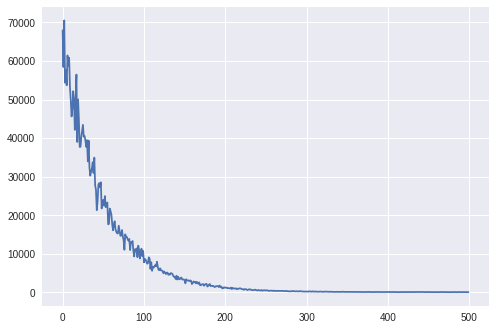

In [39]:
# take small number of iterations. Otherwise effect eon;t be visible in large no of iterations
theta_3, error_list_3 = mini_batch_GD_3(X, y, max_iters=10)

# plot error in each step
plt.plot(np.arange(len(error_list_3)), error_list_3)
plt.show()

In [40]:
print("Final Loss/Error: ", error_list_3[-1])

Final Loss/Error:  95.00766383218308


### Stochastic GD:
- We can achive stochastic GD by passing batch_size=1 in mini batch and we can also achive batch GD by passing batch_size=m in mini batch. Let us try SGD for now:

Final Error: 3.5961545178958536


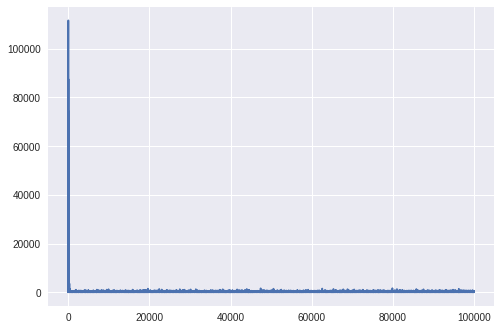

In [42]:
theta, error_list = mini_batch_GD_3(X,y,batch_size=1, max_iters=10)

print("Final Error:", error_list[-1])
plt.plot(error_list)
plt.show()

## Advantages of Mini Batch GD:

1. **Faster convergence towards optimal value of theta**
2. **Noisy updates helps to avoid local minima**. 
3. **Vectorization**
4. **No need to load entire data in memory**. 